In [1]:
%pip install tensorflow keras --quiet

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

RANDOM_STATE = 0
tf.random.set_seed(42)
np.random.seed(42)

Exercice 1 – Perceptron Multicouche avec SciKitLearn (Rappel)

1) Charger le dataset IRIS. Utilisez un pairplot (bibliothèque seaborn) pour visualiser et analyser les données.

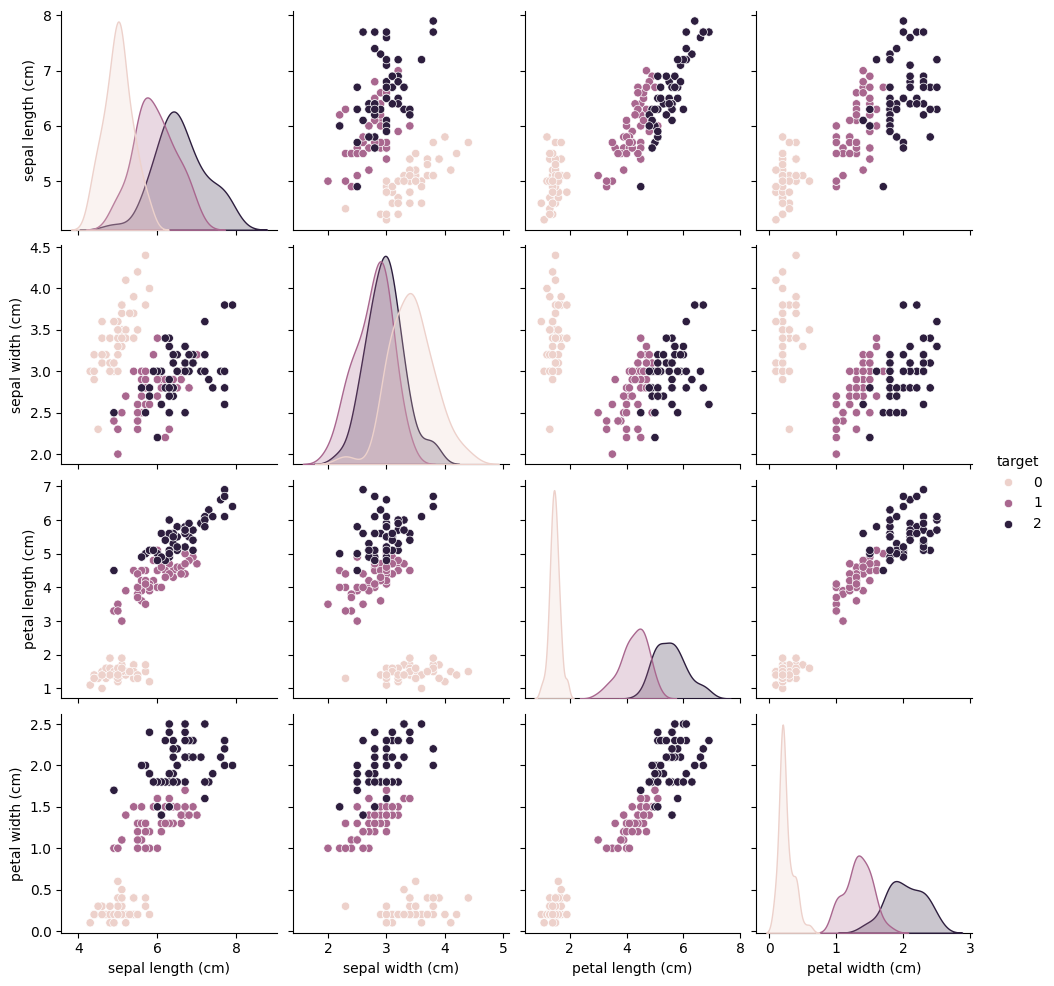

In [3]:
from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris(as_frame=True).frame
sns.pairplot(data=iris, hue="target")

2) Séparez les données en 4 matrices : x_train, x_test, y_train, y_test. Les données d'entrée sont sur les 4 premières colonnes et les données de sortie sont sur la dernière colonne. Le rapport train/test doit être de 75/25.

In [4]:
from sklearn.model_selection import train_test_split

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris.iloc[:, :4],
    iris.iloc[:, -1],
    test_size=0.25,
    random_state=RANDOM_STATE,
)

print(X_train_iris.shape, X_test_iris.shape, y_train_iris.shape, y_test_iris.shape)


(112, 4) (38, 4) (112,) (38,)


3) En utilisant SKLearn, construire un classificateur logistique sur l'ensemble de données d'entraînement. Évaluer le modèle généré sur l'ensemble de données de test et affichez le score de prédiction. Que pensez-vous de ce score ?

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
log_reg.fit(X_train_iris, y_train_iris)
y_pred_iris = log_reg.predict(X_test_iris)
print(accuracy_score(y_test_iris, y_pred_iris))
print(classification_report(y_test_iris, y_pred_iris))
print(log_reg.n_iter_)

0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[88]


4) Transformez les données pour les rendre utilisables par un réseau de neurones : la sortie doit être une matrice Nxn (n étant le nombre de classes du problème et N le nombre d'observations) au lieu d'un vecteur Nx1. Chaque colonne doit contenir un 1 si l'observation est de cette classe et zéro sinon. Regarder la fonction to_categorical.

In [6]:
from keras.utils import to_categorical

y_train_iris_cat = to_categorical(y_train_iris)
y_test_iris_cat = to_categorical(y_test_iris)
print(y_train_iris_cat[:5])
print(y_test_iris_cat[:5])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


5) Toujours en utilisant SKLearn, créer un perceptron pour classifier le jeu de données IRIS. Le réseau doit contenir une couche cachée de 16 neurones. Vous pouvez modifier les hyper-paramètres (solveur, fonction d'activation, taux d'apprentissage, etc.) du réseau comme vous le souhaitez.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", MLPClassifier(
        hidden_layer_sizes=(16,),
        random_state=RANDOM_STATE,
        max_iter=5000,
        learning_rate_init=1e-3
    ))
])

6) Entraînez le réseau sur l'ensemble de données d'entraînement et affichez le score sur les ensembles de données d'entraînement et de test.

In [8]:
mlp.fit(X_train_iris, y_train_iris)
y_pred_iris_mlp = mlp.predict(X_test_iris)

print("MLP (sklearn) accuracy:", accuracy_score(y_test_iris, y_pred_iris_mlp))
print(classification_report(y_test_iris, y_pred_iris_mlp))

MLP (sklearn) accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



Exercice 2 – Perceptron Multicouche avec Keras

1) À l'aide de Keras, créez un perceptron construit comme suit :

a. Une couche dense de 16 neurones connectée à une couche d'entrée de 4 neurones. La fonction d'activation de cette couche doit être une sigmoïde.

In [9]:
import keras

inputs = keras.Input(shape=(4,))
hidden = keras.layers.Dense(16, activation="sigmoid")(inputs)

b. Une couche de sortie de 3 neurones avec une fonction d'activation softmax.

In [10]:
outputs = keras.layers.Dense(3, activation="softmax")(hidden)

2) Utiliser la fonction de perte categorical_crossentropy (perte logarithmique), l'optimiseur Adam et activer le précalcul de la métrique de précision.

In [11]:
model_iris = keras.Model(inputs=inputs, outputs=outputs)
model_iris.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)

3) Entraîner le réseau pendant 100 epochs.

In [12]:
model_iris.fit(X_train_iris, y_train_iris_cat, epochs=100, verbose=0)

4) Comparer la précision de la classification obtenue avec la régression logistique de l'exercice 2.

In [13]:
model_iris.evaluate(X_test_iris, y_test_iris_cat, verbose=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 403ms/step - accuracy: 0.5735 - loss: 0.6436


[0.6418488025665283, 0.5789473652839661]

Exercice 3 – Adapter un réseau à un problème donné

1) Charger le dataset MNist et visualiser les données chargées. Affichez les premières images du jeu de données. Que contient ce dataset et quel est son objectif ?

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


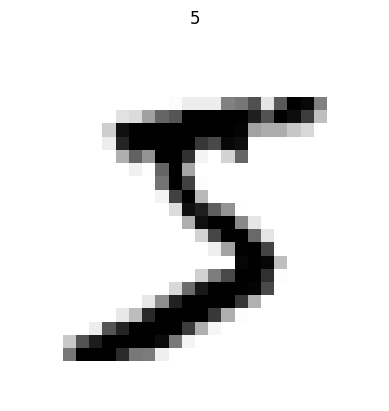

In [14]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = (
    keras.datasets.mnist.load_data()
)

plt.imshow(x_train_mnist[0].reshape(28, 28), cmap="gray_r")
plt.title(y_train_mnist[0])
plt.axis("off")
plt.show()

2) Modifier les données pour :

a. Linéariser les données en deux dimensions.

In [15]:
x_train_mnist = x_train_mnist.reshape(-1, 28 * 28)
x_test_mnist = x_test_mnist.reshape(-1, 28 * 28)

print(x_train_mnist.shape, x_test_mnist.shape)

(60000, 784) (10000, 784)


b. Normaliser les données

In [16]:
x_train_mnist = x_train_mnist / 255.0
x_test_mnist = x_test_mnist / 255.0

c. Transformer le vecteur de classes pour qu'il soit utilisable par un réseau de neurones.

In [17]:
y_train_mnist_cat = to_categorical(y_train_mnist)
y_test_mnist_cat = to_categorical(y_test_mnist)

print(y_train_mnist_cat[:5])
print(y_test_mnist_cat[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


3) Entraîner l'architecture de l'exercice précédent à ce nouveau problème. Attention à la taille des couches d'entrée et de sortie !

In [18]:
model_mnist = keras.Sequential(
    [
        keras.Input(shape=(28 * 28,)),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)
model_mnist.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)
model_mnist.fit(x_train_mnist, y_train_mnist_cat)
model_mnist.evaluate(x_test_mnist, y_test_mnist_cat)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7088 - loss: 1.2229
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8910 - loss: 0.4296


[0.3820490539073944, 0.9063000082969666]

4) Entraîner le réseau de quelques epochs avec une taille de batch de 128. Observez le score du réseau. Que pensez-vous de ce résultat ?

In [19]:
model_mnist.fit(x_train_mnist, y_train_mnist_cat, epochs=10, batch_size=128)
model_mnist.evaluate(x_test_mnist, y_test_mnist_cat)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9032 - loss: 0.3827
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9116 - loss: 0.3398
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9179 - loss: 0.3085
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9232 - loss: 0.2844
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9281 - loss: 0.2652
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9316 - loss: 0.2495
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9345 - loss: 0.2365
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9379 - loss: 0.2255
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9405 - loss: 0.2162
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9420 - loss: 0.2081
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9284 - loss: 0.2410


[0.21532011032104492, 0.9391999840736389]

Exercice 4 – Créer des réseaux plus profonds

1. Charger, afficher et formater le jeu de données Cifar10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


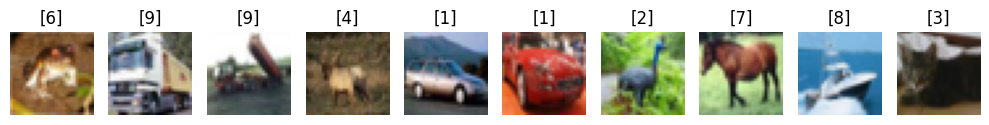

In [20]:
(X_train_cifar10, y_train_cifar10), (X_test_cifar10, y_test_cifar10) = (
    keras.datasets.cifar10.load_data()
)

fig, axs = plt.subplots(1, 10, figsize=(10, 5))

for i in range(10):
    axs[i].imshow(X_train_cifar10[i].reshape(32, 32, 3), cmap="gray_r")
    axs[i].set_title(y_train_cifar10[i])
    axs[i].axis("off")

plt.tight_layout()
plt.show()

2. Adapter  le  perceptron  de  l'exercice  précédent.  Entraîner,  évaluer  et  afficher  les
erreurs de classification. Essayez  de modifier doucement le réseau (pas de nouvelle
couche  mais  une  couche  cachée  plus  grande,  des fonctions  d'activation  différentes,
etc.)  et  évaluer  ces  différents  réseaux.  Que  pensez-vous  de  la  prédiction  que  vous
obtenez ?

In [21]:
X_train_cifar10 = X_train_cifar10.reshape(-1, 32 * 32 * 3) / 255
X_test_cifar10 = X_test_cifar10.reshape(-1, 32 * 32 * 3) / 255

X_validation_cifar10 = X_train_cifar10[-5000:]
y_validation_cifar10 = y_train_cifar10[-5000:]
X_train_cifar10 = X_train_cifar10[:-5000]
y_train_cifar10 = y_train_cifar10[:-5000]


model_cifar10 = keras.Sequential(
    [
        keras.Input(shape=(32 * 32 * 3,)),
        keras.layers.Dense(1024, activation="relu"),
        keras.layers.Dense(10, activation="softmax"),
    ]
)
model_cifar10.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)
model_cifar10.fit(
    X_train_cifar10,
    y_train_cifar10,
    epochs=10,
    validation_data=(X_validation_cifar10, y_validation_cifar10),
)
model_cifar10.evaluate(X_test_cifar10, y_test_cifar10)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2737 - loss: 2.2220 - val_accuracy: 0.3402 - val_loss: 1.8037
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3791 - loss: 1.7349 - val_accuracy: 0.3878 - val_loss: 1.7135
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4091 - loss: 1.6556 - val_accuracy: 0.4012 - val_loss: 1.7000
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4312 - loss: 1.6034 - val_accuracy: 0.4204 - val_loss: 1.6291
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4452 - loss: 1.5614 - val_accuracy: 0.4308 - val_loss: 1.5839
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4528 - loss: 1.5315 - val_accuracy: 0.4462 - val_loss: 1.5521
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4636 - loss: 1.5080 - val_accuracy: 0.4502 - val_loss: 1.5427
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4749 - loss: 1.4870 -

[1.5123577117919922, 0.45660001039505005]

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


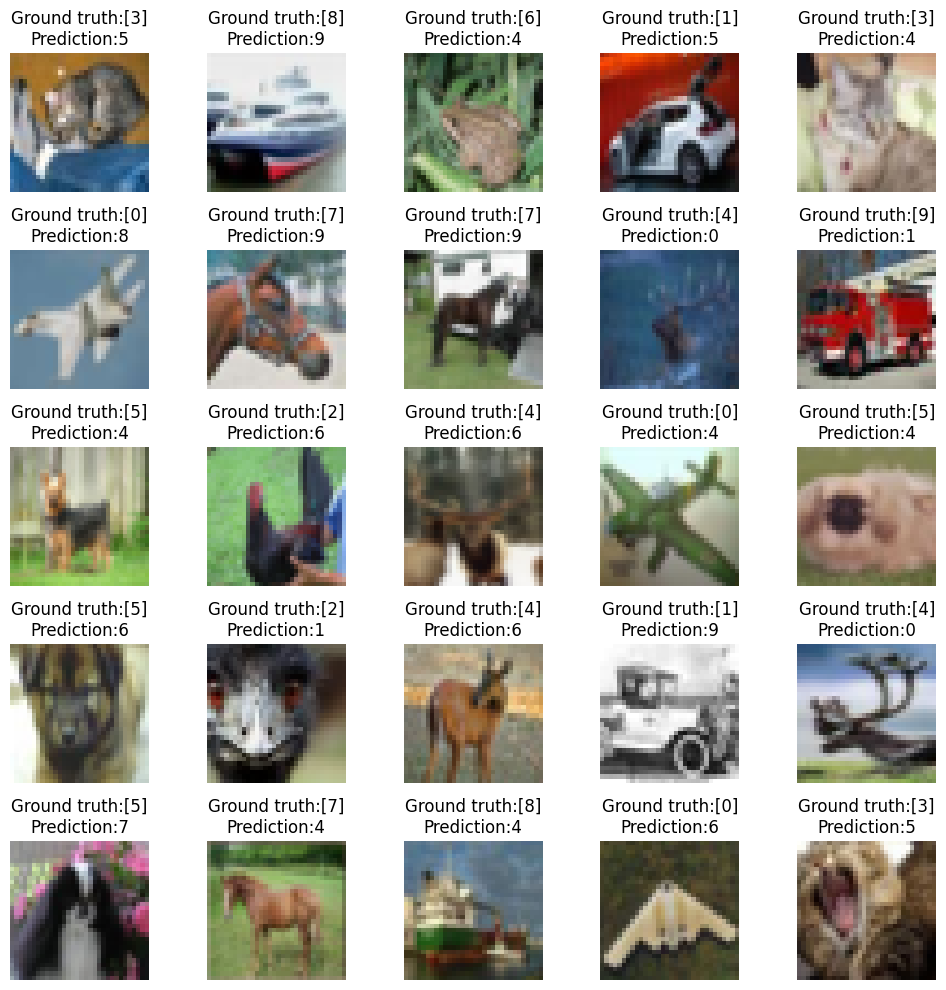

In [22]:
pred = model_cifar10.predict(X_test_cifar10, batch_size=256).argmax(axis=1)

y_test_flat = y_test_cifar10.reshape(-1)
wrong_idx = np.where(pred != y_test_flat)[0][:25]

plt.figure(figsize=(10, 10))
for i, idx in enumerate(wrong_idx):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test_cifar10[idx].reshape(32, 32, 3))
    plt.title(f"Ground truth:{y_test_cifar10[idx]}\nPrediction:{pred[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


3. Construire le perceptron multicouche suivant :

a. Première couche cachée de 512 neurones densément connectés à la couche
d'entrée, fonction d'activation relu, dropout de 0,2 et normalisation par lots.

b. Deuxième couche cachée de 512 neurones densément connectés à la couche
d'entrée, fonction d'activation Relu, normalisation par lot et dropout de 0,2.

In [23]:
model_cifar10_2 = keras.Sequential(
    [
        keras.Input(shape=(32 * 32 * 3,)),
        #
        keras.layers.Dense(512),
        keras.layers.ReLU(),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        #
        keras.layers.Dense(512),
        keras.layers.ReLU(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        #
        keras.layers.Dense(10, activation="softmax"),
    ]
)

4. Exécuter 50 epochs d'apprentissage et évaluer le réseau obtenu. Que pensez-vous du
score de prédiction ?

In [24]:
model_cifar10_2.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"],
)
history_cifar10_2 = model_cifar10_2.fit(
    X_train_cifar10,
    y_train_cifar10,
    epochs=50,
    verbose=0,
    batch_size=128,
    validation_data=(X_validation_cifar10, y_validation_cifar10),
)
train_loss_cifar10_2, train_acc_cifar10_2 = model_cifar10_2.evaluate(
    X_train_cifar10,
    y_train_cifar10,
    verbose=0,
)
test_loss_cifar10_2, test_acc_cifar10_2 = model_cifar10_2.evaluate(
    X_test_cifar10,
    y_test_cifar10,
    verbose=0,
)
print(f"Train  — loss: {train_loss_cifar10_2:.4f}, acc: {train_acc_cifar10_2:.4f}")
print(f"Test   — loss: {test_loss_cifar10_2:.4f}, acc: {test_acc_cifar10_2:.4f}")

Train  — loss: 1.2612, acc: 0.5489
Test   — loss: 1.4553, acc: 0.4887


In [25]:
from pprint import pp
pp(history_cifar10_2.history)

{'accuracy': [0.30293333530426025,
              0.36791110038757324,
              0.38804444670677185,
              0.39571112394332886,
              0.41260001063346863,
              0.4264666736125946,
              0.437155544757843,
              0.43993332982063293,
              0.4415111243724823,
              0.440711110830307,
              0.4512888789176941,
              0.45408889651298523,
              0.4600222110748291,
              0.46095556020736694,
              0.46468889713287354,
              0.4707111120223999,
              0.4722444415092468,
              0.47493332624435425,
              0.47286665439605713,
              0.4768666625022888,
              0.4796888828277588,
              0.4769333302974701,
              0.48073333501815796,
              0.48064443469047546,
              0.4851333200931549,
              0.48846668004989624,
              0.4917111098766327,
              0.4928888976573944,
              0.4988666772842407,
  

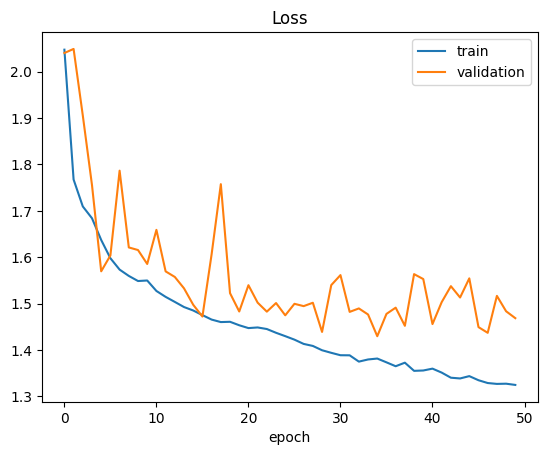

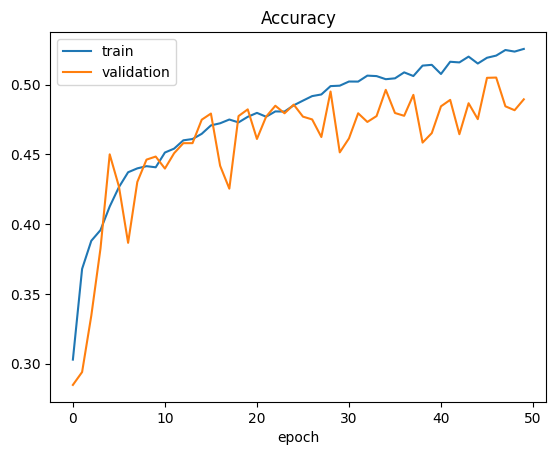

In [26]:
plt.figure()
plt.plot(history_cifar10_2.history["loss"])
plt.plot(history_cifar10_2.history["val_loss"])
plt.legend(["train", "validation"])
plt.title("Loss")
plt.xlabel("epoch")
plt.figure()
plt.plot(history_cifar10_2.history["accuracy"])
plt.plot(history_cifar10_2.history["val_accuracy"])
plt.legend(["train", "validation"])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.show()

5. Enregistrer votre modèle sur votre disque dur et calculer la précision et la perte pour
chaque epoch d'entraînement.

In [27]:
save_dir = "saved_models"
os.makedirs(save_dir, exist_ok=True)

model_path = os.path.join(save_dir, "cifar10_2_mlp_deep.keras")
model_cifar10_2.save(model_path)

history_dict = history_cifar10_2.history
history_df = pd.DataFrame(history_dict)
history_df.insert(0, "epoch", np.arange(1, len(history_df) + 1))

history_df = history_df.rename(
    columns={
        "loss": "train_loss",
        "accuracy": "train_accuracy",
        "val_loss": "val_loss",
        "val_accuracy": "val_accuracy",
    }
)

display(history_df)

,epoch,train_accuracy,train_loss,val_accuracy,val_loss
0,1,0.302933,2.047462,0.2848,2.040275
1,2,0.367911,1.767473,0.2940,2.049083
2,3,0.388044,1.709452,0.3344,1.905589
3,4,0.395711,1.683955,0.3826,1.755352
4,5,0.412600,1.637138,0.4500,1.569600
5,6,0.426467,1.597809,0.4270,1.603815
6,7,0.437156,1.573271,0.3866,1.786596
7,8,0.439933,1.559659,0.4302,1.621082
8,9,0.441511,1.548663,0.4462,1.615468
9,10,0.440711,1.549793,0.4484,1.585419


6. Pensez-vous pouvoir faire mieux ? Si oui, construisez l'architecture !

In [29]:
l2 = keras.regularizers.l2(1e-4)

model_cifar10_3 = keras.Sequential([
    keras.Input(shape=(32 * 32 * 3,)),

    keras.layers.Dense(1024, kernel_regularizer=l2),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dropout(0.35),

    keras.layers.Dense(512, kernel_regularizer=l2),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dropout(0.30),

    keras.layers.Dense(256, kernel_regularizer=l2),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(128, kernel_regularizer=l2),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Dropout(0.20),

    keras.layers.Dense(10, activation="softmax"),
])

model_cifar10_3.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["accuracy"],
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=10,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=4,
        min_lr=1e-6,
        verbose=1
    ),
]

history_cifar10_3 = model_cifar10_3.fit(
    X_train_cifar10,
    y_train_cifar10,
    epochs=80,
    batch_size=128,
    validation_data=(X_validation_cifar10, y_validation_cifar10),
    callbacks=callbacks,
    verbose=0
)

train_loss_cifar10_3, train_acc_cifar10_3 = model_cifar10_3.evaluate(
    X_train_cifar10, y_train_cifar10, verbose=0
)
test_loss_cifar10_3, test_acc_cifar10_3 = model_cifar10_3.evaluate(
    X_test_cifar10, y_test_cifar10, verbose=0
)

print(f"Train — loss: {train_loss_cifar10_3:.4f}, acc: {train_acc_cifar10_3:.4f}")
print(f"Test  — loss: {test_loss_cifar10_3:.4f}, acc: {test_acc_cifar10_3:.4f}")



Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 24: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 30: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 35: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 41: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 47: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 51: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 55: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 59: ReduceLROnPlateau reducing learning rate to 1e-06.
Train — loss: 0.5385, acc: 0.8883
Test  — loss: 1.4965, acc: 0.5943


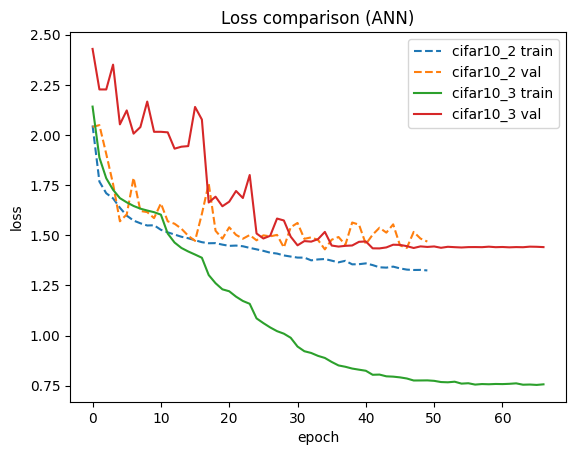

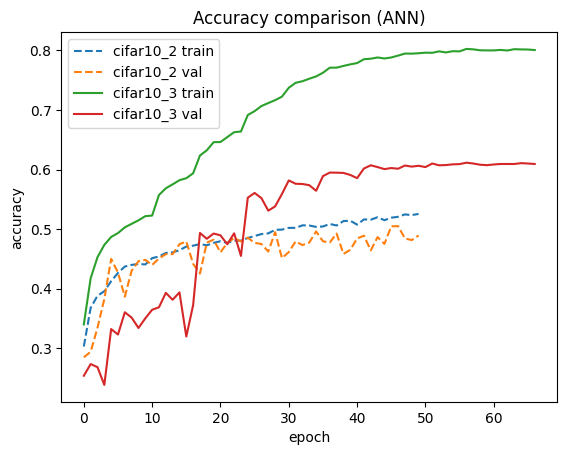

In [31]:
plt.figure()
plt.plot(history_cifar10_2.history["loss"], linestyle="--")
plt.plot(history_cifar10_2.history["val_loss"], linestyle="--")

plt.plot(history_cifar10_3.history["loss"])
plt.plot(history_cifar10_3.history["val_loss"])

plt.legend([
    "cifar10_2 train",
    "cifar10_2 val",
    "cifar10_3 train",
    "cifar10_3 val",
])
plt.title("Loss comparison (ANN)")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

plt.figure()
plt.plot(history_cifar10_2.history["accuracy"], linestyle="--")
plt.plot(history_cifar10_2.history["val_accuracy"], linestyle="--")

plt.plot(history_cifar10_3.history["accuracy"])
plt.plot(history_cifar10_3.history["val_accuracy"])

plt.legend([
    "cifar10_2 train",
    "cifar10_2 val",
    "cifar10_3 train",
    "cifar10_3 val",
])
plt.title("Accuracy comparison (ANN)")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()
